<a href="https://colab.research.google.com/github/likeshd/predictive_analysis/blob/main/Time_Series_Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting.
If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA).
# What is ARIMA?
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

w let’s start with the task of Time Series Forecasting with ARIMA.  first collect Google stock price data using the Yahoo Finance API

In [12]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2024-03-12  138.250000  140.279999  138.210007  139.619995  139.619995   
247 2024-03-13  140.059998  142.190002  140.009995  140.770004  140.770004   
248 2024-03-14  142.300003  144.729996  141.485001  144.339996  144.339996   
249 2024-03-15  143.410004  144.339996  141.130005  142.169998  142.169998   
250 2024-03-18  149.369995  152.929993  148.139999  148.479996  148.479996   

       Volume  
246  19019700  
247  19637000  
248  36117900  
249  41025900  
250  47650100  


In [13]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-03-20  101.930000
1 2023-03-21  105.839996
2 2023-03-22  104.220001
3 2023-03-23  106.260002
4 2023-03-24  106.059998


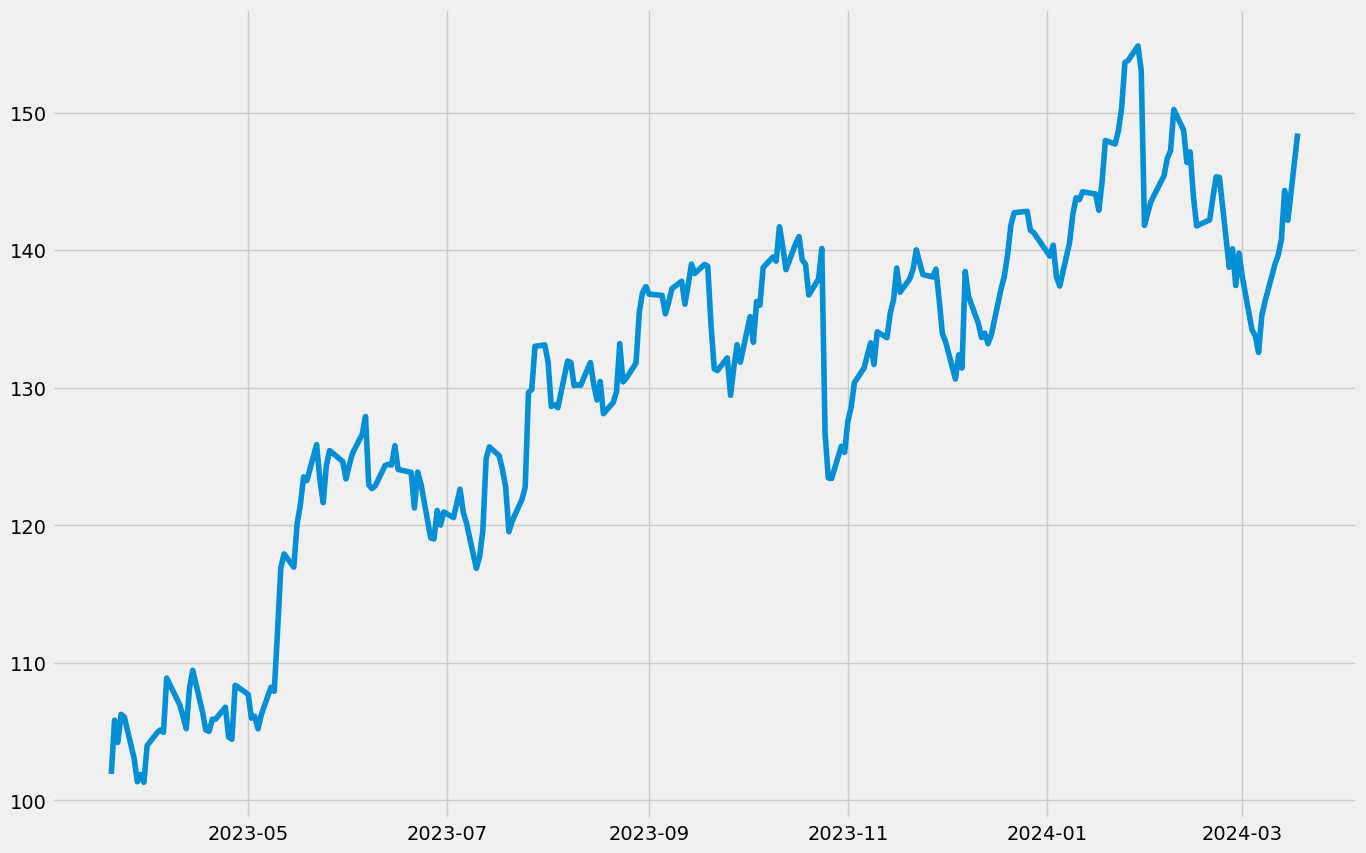

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

Using ARIMA for Time Series Forecasting
Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 640x480 with 0 Axes>

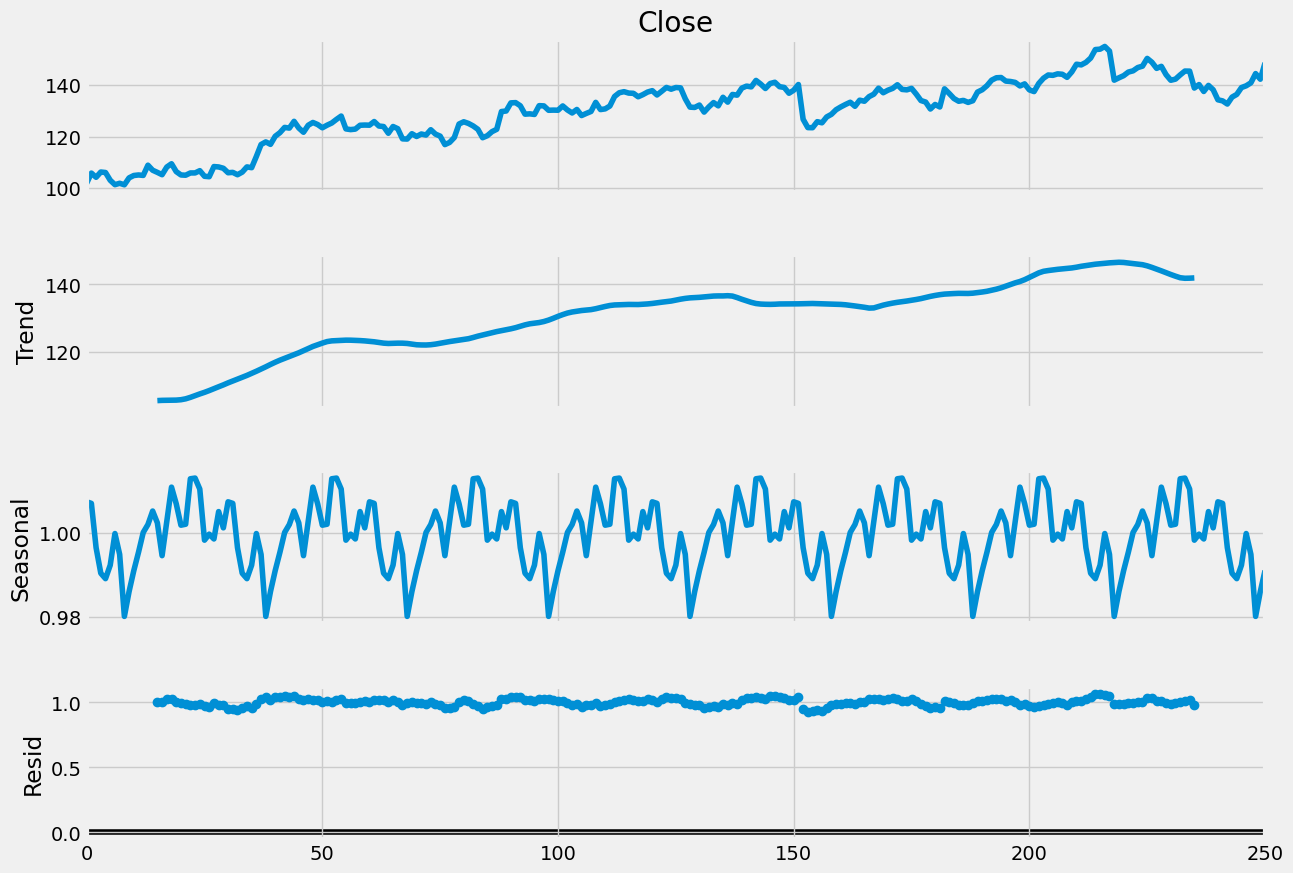

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

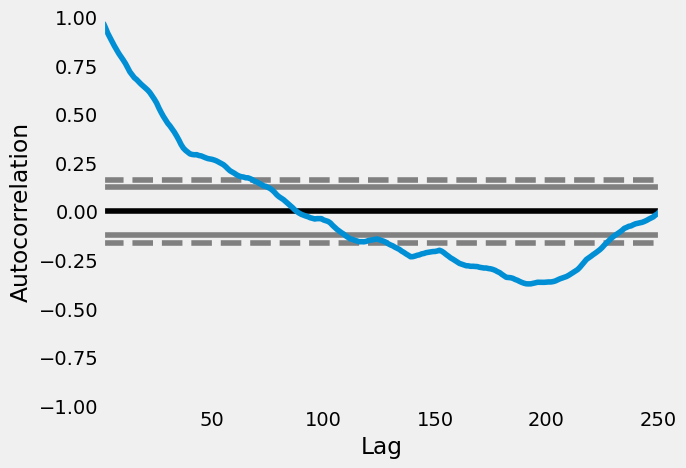

In [16]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):



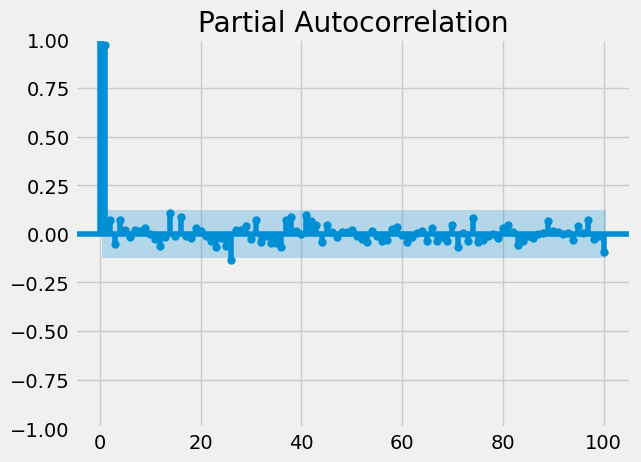

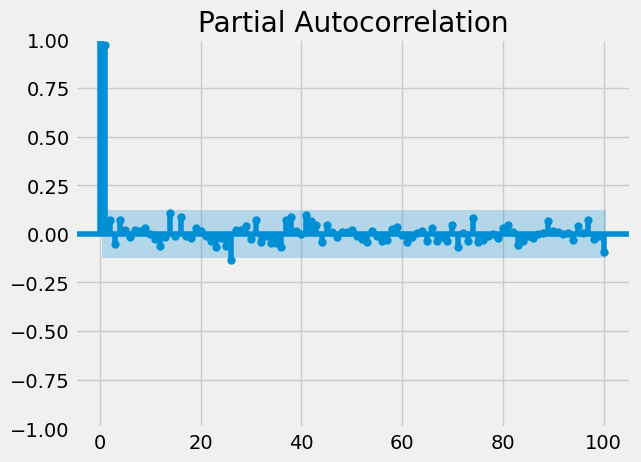

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [19]:
import statsmodels.api as sm


In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [21]:
p, d, q = 5, 1, 2
# from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(data["Close"], order=(p,d,q))
result = model.fit()

# model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -560.705
Date:                Tue, 19 Mar 2024   AIC                           1137.411
Time:                        12:35:11   BIC                           1165.583
Sample:                             0   HQIC                          1148.749
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7217      3.005      0.240      0.810      -5.168       6.612
ar.L2          0.1716      2.817      0.061      0.951      -5.349       5.692
ar.L3         -0.0884      0.099     -0.894      0.3

In [22]:
# Here’s how to predict the values using the ARIMA model:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      101.930009
2      105.904784
3      104.258371
4      105.978622
          ...    
246    139.136739
247    139.901652
248    140.757856
249    144.430939
250    142.079233
Name: predicted_mean, Length: 251, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [23]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -545.308
Date:                            Tue, 19 Mar 2024   AIC                           1120.615
Time:                                    12:36:29   BIC                           1172.700
Sample:                                         0   HQIC                          1141.606
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2380      0.163      7.574      0.000       0.918       1.558
ar.L2         -0.7997      0.160   

In [24]:
# Now let’s predict the future stock prices using the SARIMA model for the next 10 days:
predictions = model.predict(len(data), len(data)+10)
print(predictions)



251    147.575161
252    148.618478
253    148.355122
254    149.283658
255    149.543512
256    149.807647
257    150.163433
258    150.485750
259    149.506783
260    148.499837
261    147.696190
Name: predicted_mean, dtype: float64


<Axes: >

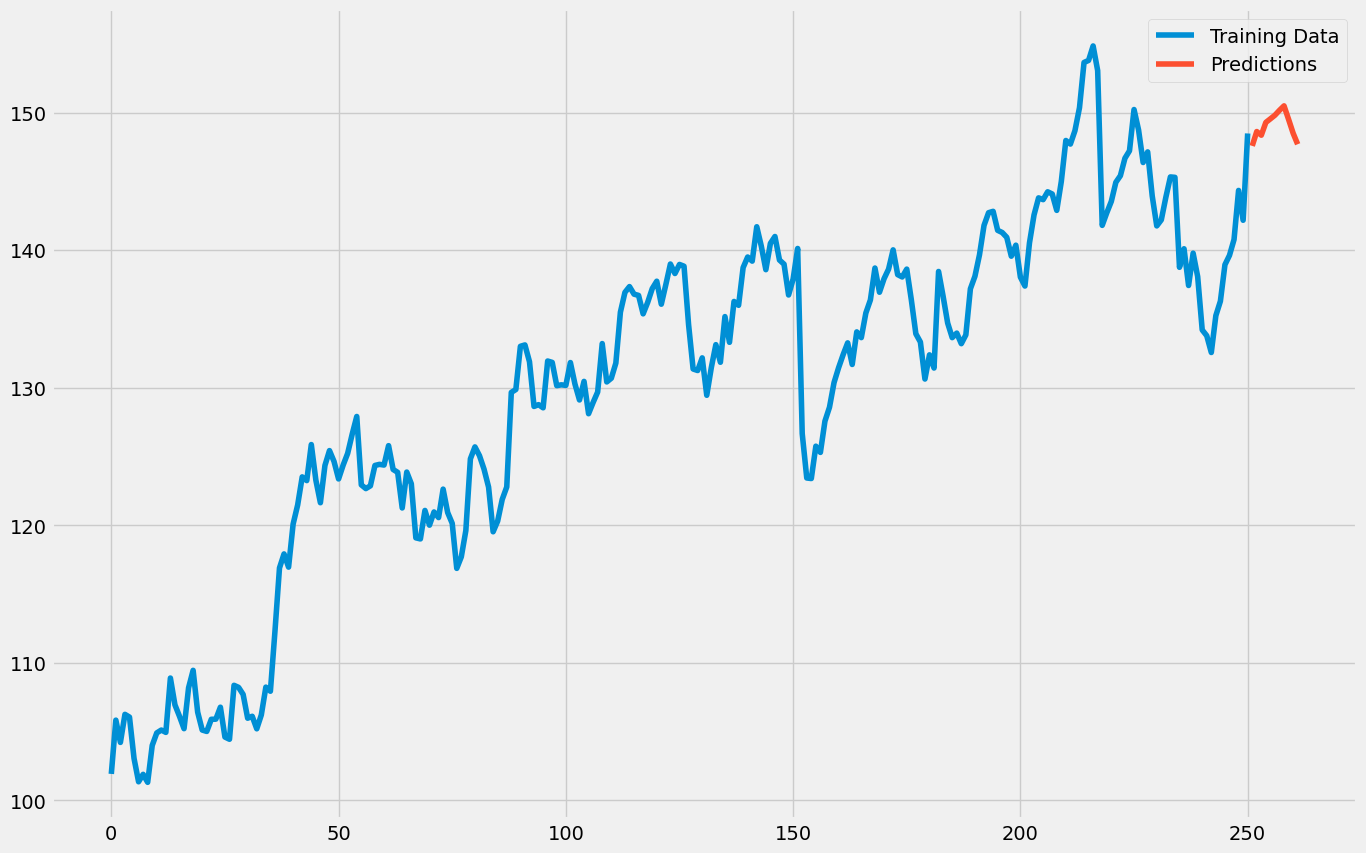

In [25]:
# Here’s how you can plot the predictions:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

